# XNLI Results

In [176]:
import os
import numpy as np
import json
import pandas as pd
model_list=['mt5-300M','mt5-580M','mt5-1B','mbert','xlmr','mt5-3B','bloom7b', 'falcon7b' ,'mt5-13B']
all_data = []
for model_name in model_list:
    model_data = []
    for i in range(1,3):
        with open(f'/home/s6amalia/multi_run/xnli/{model_name}-xnli/results{i}.json', 'r') as f:
            res = json.load(f)
            # print(res['all_results'][1])
    
            data = []
            for lang, accuracy in res.items():
    
                data.append({'Model': model_name, 
                         'Language': lang, 
                         'Clean Accuracy': np.round(accuracy['clean_accuracy'],2), 
                         'Noisy Accuracy':  np.round(accuracy['noisy_accuracy'],2)})
            model_data.append(data)
    
        # model_data.append(data)
        
    all_data.append(model_data)
# print(model_data)
all_results = []
# print(all_data[1])
for model in all_data:
    res1 = pd.DataFrame(model[0])
    res2 = pd.DataFrame(model[1])

    res1 = res1.rename(columns={'Clean Accuracy': 'Clean Accuracy_1', 'Noisy Accuracy': 'Noisy Accuracy_1'})
    res2 = res2.rename(columns={'Clean Accuracy': 'Clean Accuracy_2', 'Noisy Accuracy': 'Noisy Accuracy_2'})
    # res3 = res3.rename(columns={'Clean Accuracy': 'Clean Accuracy_3', 'Noisy Accuracy': 'Noisy Accuracy_3'})

    # print(res2)
    df_merged = pd.merge(res1, res2, on=['Model', 'Language'])
    # df_merged = pd.merge(df_merged, res3, on=['Model', 'Language'])
    # print(df_merged)
    # break
    all_results.append(df_merged)

results_xnli = pd.concat(all_results)
results_xnli['C-N_1'] = results_xnli['Clean Accuracy_1'] - results_xnli['Noisy Accuracy_1']
results_xnli['C-N_2'] = results_xnli['Clean Accuracy_2'] - results_xnli['Noisy Accuracy_2']
# results_snips['C-N_3'] = results_snips['Clean Accuracy_3'] - results_snips['Noisy Accuracy_3']
results_xnli['Avg Clean'] =  np.round((results_xnli['Clean Accuracy_1'] + results_xnli['Clean Accuracy_2'] )/2,2)
results_xnli['Avg Noisy'] =  np.round((results_xnli['Noisy Accuracy_1'] + results_xnli['Noisy Accuracy_2'] )/2,2)
results_xnli['Avg C-N'] =  np.round((results_xnli['C-N_1'] + results_xnli['C-N_2'] )/2,2)
results_xnli['StdDev'] = np.round(results_xnli[['C-N_1', 'C-N_2']].std(axis=1),2)
results_xnli['Relative Gap'] = np.round(100*(results_xnli['Avg C-N']/results_xnli['Avg Clean']),2)
results_xnli

,Model,Language,Clean Accuracy_1,Noisy Accuracy_1,Clean Accuracy_2,Noisy Accuracy_2,C-N_1,C-N_2,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mt5-300M,en,73.91,65.83,71.80,64.77,8.08,7.03,72.85,65.30,7.56,0.74,10.38
1,mt5-300M,de,68.76,65.87,67.78,64.39,2.89,3.39,68.27,65.13,3.14,0.35,4.60
2,mt5-300M,es,71.12,66.09,69.00,64.49,5.03,4.51,70.06,65.29,4.77,0.37,6.81
3,mt5-300M,fr,70.02,65.01,68.12,63.41,5.01,4.71,69.07,64.21,4.86,0.21,7.04
4,mt5-300M,hi,63.83,61.92,62.85,60.12,1.91,2.73,63.34,61.02,2.32,0.58,3.66
5,mt5-300M,tr,66.81,62.85,65.53,61.72,3.96,3.81,66.17,62.28,3.89,0.11,5.88
0,mt5-580M,en,84.45,74.25,81.22,73.39,10.20,7.83,82.84,73.82,9.02,1.68,10.89
1,mt5-580M,de,79.82,74.71,77.58,73.15,5.11,4.43,78.70,73.93,4.77,0.48,6.06
2,mt5-580M,es,81.36,75.07,77.88,72.99,6.29,4.89,79.62,74.03,5.59,0.99,7.02
3,mt5-580M,fr,80.38,75.55,77.82,73.05,4.83,4.77,79.10,74.30,4.80,0.04,6.07


In [177]:
preferred_order = ['mbert','xlmr','mt5-300M','mt5-580M','mt5-1B','mt5-3B','bloom7b', 'falcon7b' ,'mt5-13B']

# Convert the 'Model' column to a categorical type with the preferred order
results_xnli['Model'] = pd.Categorical(results_xnli['Model'], categories=preferred_order, ordered=True)
# results_snips_avg['Model'] = pd.Categorical(results_snips_avg['Model'], categories=preferred_order, ordered=True)
# Sort the DataFrame by the 'Model' column
results_xnli = results_xnli.sort_values('Model').reset_index(drop=True)
# results_snips_avg = results_snips_avg.sort_values('Model').reset_index(drop=True)
results_xnli

,Model,Language,Clean Accuracy_1,Noisy Accuracy_1,Clean Accuracy_2,Noisy Accuracy_2,C-N_1,C-N_2,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mbert,tr,73.37,68.64,73.45,68.64,4.73,4.81,73.41,68.64,4.77,0.06,6.50
1,mbert,hi,69.90,66.93,69.30,65.51,2.97,3.79,69.60,66.22,3.38,0.58,4.86
2,mbert,fr,78.82,72.10,77.45,72.34,6.72,5.11,78.13,72.22,5.91,1.14,7.56
3,mbert,es,79.56,71.50,79.08,72.38,8.06,6.70,79.32,71.94,7.38,0.96,9.30
4,mbert,de,78.24,72.51,77.84,71.94,5.73,5.90,78.04,72.22,5.81,0.12,7.44
5,mbert,en,82.55,71.94,82.40,72.40,10.61,10.00,82.48,72.17,10.30,0.43,12.49
6,xlmr,en,84.79,75.21,84.13,75.59,9.58,8.54,84.46,75.40,9.06,0.74,10.73
7,xlmr,tr,77.29,71.86,76.31,71.28,5.43,5.03,76.80,71.57,5.23,0.28,6.81
8,xlmr,hi,74.35,70.86,74.53,71.16,3.49,3.37,74.44,71.01,3.43,0.08,4.61
9,xlmr,fr,80.68,75.03,79.90,75.43,5.65,4.47,80.29,75.23,5.06,0.83,6.30


In [178]:
results_xnli_avg = results_xnli.drop(columns=['Language']).groupby('Model').mean().reset_index()
results_xnli_avg = results_xnli_avg.round(2)
results_xnli_avg

/tmp/ipykernel_572308/3289780413.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_xnli_avg = results_xnli.drop(columns=['Language']).groupby('Model').mean().reset_index()


,Model,Clean Accuracy_1,Noisy Accuracy_1,Clean Accuracy_2,Noisy Accuracy_2,C-N_1,C-N_2,Avg Clean,Avg Noisy,Avg C-N,StdDev,Relative Gap
0,mbert,77.07,70.60,76.59,70.54,6.47,6.05,76.83,70.57,6.26,0.55,8.02
1,xlmr,79.85,73.73,79.18,73.76,6.12,5.42,79.52,73.75,5.77,0.49,7.19
2,mt5-300M,69.08,64.60,67.51,63.15,4.48,4.36,68.29,63.87,4.42,0.39,6.40
3,mt5-580M,79.49,73.61,75.72,71.19,5.87,4.53,77.60,72.40,5.20,0.95,6.62
4,mt5-1B,72.99,67.90,83.80,78.32,5.09,5.48,78.40,73.11,5.29,0.45,6.68
5,mt5-3B,84.47,78.89,86.04,80.90,5.58,5.13,85.26,79.90,5.36,0.42,6.25
6,bloom7b,84.98,79.84,85.05,79.67,5.13,5.38,85.01,79.76,5.25,0.20,6.15
7,falcon7b,86.69,81.09,86.97,81.27,5.60,5.69,86.83,81.18,5.64,0.40,6.51
8,mt5-13B,87.25,82.88,87.25,82.88,4.37,4.37,87.25,82.88,4.37,0.00,5.00


In [184]:
all_df_b = []
best_per=results_xnli_avg[['Clean Accuracy_1', 'Clean Accuracy_2']].idxmax(axis=1).str.replace('Clean Accuracy', '')
for i in range(len(results_xnli_avg)):
    
    df_b = results_xnli[results_xnli['Model']==results_xnli_avg['Model'][i]][['Model','Language','Clean Accuracy'+best_per[i],'Noisy Accuracy'+best_per[i]]]
    df_b = df_b.rename(columns=lambda x: x.split('_')[0] if '_' in x else x)
    all_df_b.append(df_b)

best_res_xnli = pd.concat(all_df_b)
best_res_xnli['C-N'] = best_res_xnli['Clean Accuracy'] - best_res_xnli['Noisy Accuracy']
best_res_xnli['Relative Gap'] = np.round(100*(best_res_xnli['C-N']/best_res_xnli['Clean Accuracy']),2)
best_res_xnli
best_res_xnli['C-N'] = best_res_xnli['C-N'].round(2)
best_res_xnli[best_res_xnli['Language']=='hi'][['Model','C-N']]
best_res_xnli

,Model,Language,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,tr,73.37,68.64,4.73,6.45
1,mbert,hi,69.90,66.93,2.97,4.25
2,mbert,fr,78.82,72.10,6.72,8.53
3,mbert,es,79.56,71.50,8.06,10.13
4,mbert,de,78.24,72.51,5.73,7.32
5,mbert,en,82.55,71.94,10.61,12.85
6,xlmr,en,84.79,75.21,9.58,11.30
7,xlmr,tr,77.29,71.86,5.43,7.03
8,xlmr,hi,74.35,70.86,3.49,4.69
9,xlmr,fr,80.68,75.03,5.65,7.00


In [185]:
best_res_xnli['Language'] = pd.Categorical(best_res_xnli['Language'], categories=['en', 'de', 'es', 'fr', 'hi', 'tr'], ordered=True)

# Sort by Language
best_res_xnli = best_res_xnli.sort_values(['Model', 'Language'])

# Reset the index
best_res_xnli = best_res_xnli.reset_index(drop=True)


,Model,Language,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,en,82.55,71.94,10.61,12.85
1,mbert,de,78.24,72.51,5.73,7.32
2,mbert,es,79.56,71.50,8.06,10.13
3,mbert,fr,78.82,72.10,6.72,8.53
4,mbert,hi,69.90,66.93,2.97,4.25
5,mbert,tr,73.37,68.64,4.73,6.45
6,xlmr,en,84.79,75.21,9.58,11.30
7,xlmr,de,80.06,74.21,5.85,7.31
8,xlmr,es,81.94,75.23,6.71,8.19
9,xlmr,fr,80.68,75.03,5.65,7.00


In [195]:
best_res_xnli.sort_values([ 'Language'])

,Model,Language,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,en,82.55,71.94,10.61,12.85
44,mt5-13B,en,91.28,86.03,5.25,5.75
40,falcon7b,en,90.68,84.59,6.09,6.72
36,bloom7b,en,89.52,82.46,7.06,7.89
30,mt5-3B,en,90.10,83.09,7.01,7.78
18,mt5-580M,en,84.45,74.25,10.20,12.08
12,mt5-300M,en,73.91,65.83,8.08,10.93
24,mt5-1B,en,88.82,80.38,8.44,9.50
6,xlmr,en,84.79,75.21,9.58,11.30
1,mbert,de,78.24,72.51,5.73,7.32


In [194]:
for model, group in best_res_xnli.groupby('Model'):
    latex = group.T.to_latex(index=False, float_format="%.2f")
    print(f"Model: {model}\n{latex}\n")

Model: mbert
\begin{tabular}{llllll}
\toprule
0 & 1 & 2 & 3 & 4 & 5 \\
\midrule
mbert & mbert & mbert & mbert & mbert & mbert \\
en & de & es & fr & hi & tr \\
82.55 & 78.24 & 79.56 & 78.82 & 69.90 & 73.37 \\
71.94 & 72.51 & 71.50 & 72.10 & 66.93 & 68.64 \\
10.61 & 5.73 & 8.06 & 6.72 & 2.97 & 4.73 \\
12.85 & 7.32 & 10.13 & 8.53 & 4.25 & 6.45 \\
\bottomrule
\end{tabular}


Model: xlmr
\begin{tabular}{llllll}
\toprule
6 & 7 & 8 & 9 & 10 & 11 \\
\midrule
xlmr & xlmr & xlmr & xlmr & xlmr & xlmr \\
en & de & es & fr & hi & tr \\
84.79 & 80.06 & 81.94 & 80.68 & 74.35 & 77.29 \\
75.21 & 74.21 & 75.23 & 75.03 & 70.86 & 71.86 \\
9.58 & 5.85 & 6.71 & 5.65 & 3.49 & 5.43 \\
11.30 & 7.31 & 8.19 & 7.00 & 4.69 & 7.03 \\
\bottomrule
\end{tabular}


Model: mt5-300M
\begin{tabular}{llllll}
\toprule
12 & 13 & 14 & 15 & 16 & 17 \\
\midrule
mt5-300M & mt5-300M & mt5-300M & mt5-300M & mt5-300M & mt5-300M \\
en & de & es & fr & hi & tr \\
73.91 & 68.76 & 71.12 & 70.02 & 63.83 & 66.81 \\
65.83 & 65.87 & 66.09

/tmp/ipykernel_572308/1803909523.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for model, group in best_res_xnli.groupby('Model'):


In [171]:
averages = df_xnli.groupby('Language')['Clean Accuracy'].mean()
averages

Language
de    80.612500
en    85.550000
es    82.208889
fr    81.533333
hi    74.535000
tr    77.114286
Name: Clean Accuracy, dtype: float64

In [180]:
b_avg_xnli = best_res_xnli.drop(columns=['Language']).groupby('Model').mean().reset_index()
b_avg_xnli = b_avg_xnli.round(2)
b_avg_xnli

/tmp/ipykernel_572308/1902141702.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b_avg_xnli = best_res_xnli.drop(columns=['Language']).groupby('Model').mean().reset_index()


,Model,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
0,mbert,77.07,70.60,6.47,8.26
1,xlmr,79.85,73.73,6.12,7.59
2,mt5-300M,69.08,64.60,4.48,6.38
3,mt5-580M,79.49,73.61,5.87,7.32
4,mt5-1B,83.80,78.32,5.48,6.50
5,mt5-3B,86.04,80.90,5.14,5.94
6,bloom7b,85.05,79.67,5.38,6.30
7,falcon7b,86.97,81.27,5.70,6.55
8,mt5-13B,87.25,82.88,4.37,5.00


# Average Results over languages

In [182]:
# avg_xnli = df_xnli.drop(columns=['Language']).groupby('Model').mean().reset_index()
# avg_xnli = avg_xnli.round(2)
# avg_xnli
# df_xnli['C-N'] = df_xnli['C-N'].round(2)
# avg_xnli['C-N'].values
# df_xnli[df_xnli['Language']=='tr'][['Model','C-N']]
# lang = ['en' , 'de' , 'es' , 'fr' ,'hi','tr']
best_res_xnli.to_csv('xnli.csv')
# for m in avg_xnli['Model']:
# # best_res_wikiann['Relative Gap'] = np.round(100*(best_res_wikiann['C-N']/best_res_wikiann['Clean F1']),2)
#     tt = df_xnli[df_xnli['Model']==m]
#     # print(tt)
#     # tt.fillna(0)
#     print(m)
#     print(' & '.join(str(tt[tt['Language']==i]['Clean Accuracy'].values[0]) for i in lang )) 
#     print(' & '.join(str(tt[tt['Language']==i]['Noisy Accuracy'].values[0]) for i in lang)) 
#     print(' & '.join(str(tt[tt['Language']==i]['C-N'].values[0]) for i in lang))
# # results_snips_avg['Model']

In [157]:
df_xnli[df_xnli['Model']=='falcon7b']

,Model,Language,Clean Accuracy,Noisy Accuracy,C-N,Relative Gap
40,falcon7b,en,90.68,84.59,6.09,6.72
41,falcon7b,es,86.31,80.42,5.89,6.82
42,falcon7b,de,84.63,78.54,6.09,7.20
43,falcon7b,fr,86.25,81.54,4.71,5.46


## Number of tokens per language used for each model's pre training process

In [91]:
data = {
    'mt5-300M': [2733, 433, 347, 318, 71, 24],
    'mt5-580M': [2733, 433, 347, 318, 71, 24],
    'mt5-1B': [2733, 433, 347, 318, 71, 24],
    'mt5-3B': [2733, 433, 347, 318, 71, 24],
    'mt5-13B': [2733, 433, 347, 318, 71, 24],
    'xlmr': [0.30, 0.05, 0.07, 0.06, 0.02, 0.02],
    'falcon7b': [750, 17, 18, 16, np.nan, np.nan],
    'mbert': [4.59, 1.20, 1.56, 1.68, 0.16, 0.06],
    'bloom7b': [112, 40, np.nan, 46, np.nan, 5.6]
}

index = ['en', 'es', 'de', 'fr', 'tr', 'hi']

df_lang_size = pd.DataFrame(data, index=index)
df_lang_size

,mt5-300M,mt5-580M,mt5-1B,mt5-3B,mt5-13B,xlmr,falcon7b,mbert,bloom7b
en,2733,2733,2733,2733,2733,0.30,750.0,4.59,112.0
es,433,433,433,433,433,0.05,17.0,1.20,40.0
de,347,347,347,347,347,0.07,18.0,1.56,NaN
fr,318,318,318,318,318,0.06,16.0,1.68,46.0
tr,71,71,71,71,71,0.02,NaN,0.16,NaN
hi,24,24,24,24,24,0.02,NaN,0.06,5.6


### sample of C-N and Language size for mbert

<Axes: xlabel='Language'>

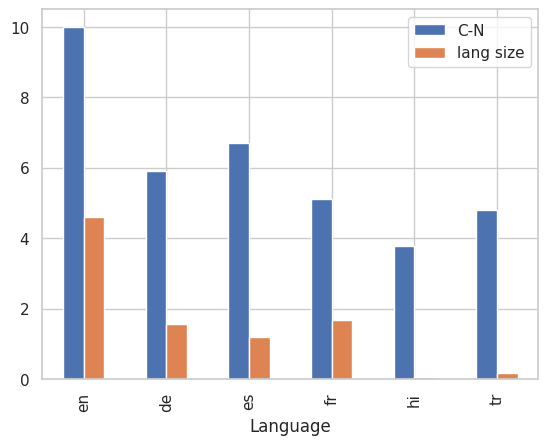

In [92]:
m = df_xnli[df_xnli['Model']=='mbert'][['Language','C-N','Clean Accuracy']]
m['lang size'] = df_lang_size['mbert'][m['Language']].values
m[['Language','C-N','lang size']].plot.bar(x = 'Language')

## Correlation bet. [size of languages and C-N] , [size of languages, Clean F1]

[[0.89753054 0.89626865 0.86883818 0.95818655 0.96610053 0.97224397
  0.95456196 0.39883579 0.58169343]]
[[0.84197257 0.76766583 0.77652413 0.78993229 0.84661866 0.79486186
  0.87647078 0.95338531 0.89280508]]


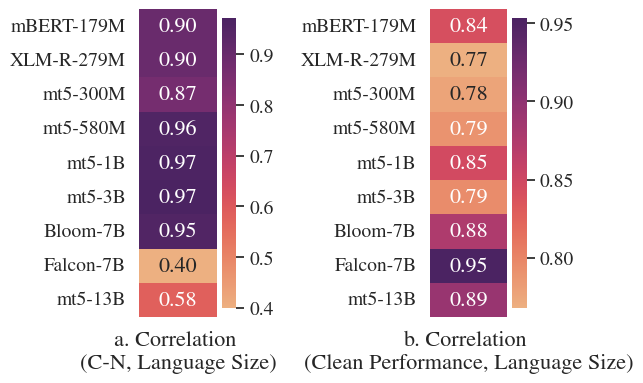

In [181]:
lang_cn=[]
lang_cl = []
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Provide the font's path manually

font_path = '/fonts/Times-Roman Regular.ttf'
# Create a font property object
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)

font_size = 16
# Set the font as the default font for all text elements in plots
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = font_size

import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(b_avg_xnli['Model'])):
    model_name =b_avg_xnli['Model'][i]
    mt5=best_res_xnli[best_res_xnli['Model']==model_name][['Language','C-N','Clean Accuracy']]
    mt5['lang size'] = df_lang_size[model_name][mt5['Language']].values
    # res=mt5[['lang size','Avg C-N','Avg Clean']].corr()
    lang_cn.append(mt5[['lang size','C-N','Clean Accuracy']].corr()['lang size']['C-N'])
    # print(lang_cn)
    lang_cl.append(mt5[['lang size','C-N','Clean Accuracy']].corr()['lang size']['Clean Accuracy'])

fig, axs = plt.subplots(1, 2, figsize=(5, 4))
labels = ['mBERT-179M', 'XLM-R-279M', 'mt5-300M', 'mt5-580M', 'mt5-1B', 'mt5-3B', 'Bloom-7B', 'Falcon-7B', 'mt5-13B']
# Create the heatmaps
# sns.heatmap(data1, ax=axs[0])
# sns.heatmap(data2, ax=axs[1])
df = pd.DataFrame([lang_cn], columns=labels, index=['a. Correlation \n(C-N, Language Size)'])
# plt.figure(figsize=(1.5, 5))

heatmap1 =sns.heatmap(df.T,  cmap="flare",fmt=".2f",annot=True, ax=axs[0])
axs[0].set_yticklabels(axs[0].get_yticklabels(), size=font_size-2)  # Set ytick label size
axs[0].set_xticklabels(axs[0].get_xticklabels(), size=font_size)
axs[0].set_ylabel('')
cbar1 = heatmap1.collections[0].colorbar

cbar1.ax.tick_params(labelsize=font_size-2)
print(df.values)
# plt.show()
# plt.figure(figsize=(1.5, 5))
# plt.figure(figsize=(1.5, 5))
df = pd.DataFrame([lang_cl], columns=labels, index=['b. Correlation \n(Clean Performance, Language Size)'])
heatmap2 =sns.heatmap(df.T,  cmap="flare" ,fmt=".2f",annot=True, ax=axs[1])
axs[1].set_yticklabels(axs[1].get_yticklabels(), size=font_size-2)  # Set ytick label size
axs[1].set_xticklabels(axs[1].get_xticklabels(), size=font_size)
axs[1].set_ylabel('')
cbar1 = heatmap2.collections[0].colorbar
cbar1.ax.tick_params(labelsize=font_size-2)
plt.subplots_adjust(wspace=2)
plt.savefig('/xnli_corr_lang.pdf',bbox_inches='tight')
# df.plot.bar()
print(df.values)
# df

<Axes: >

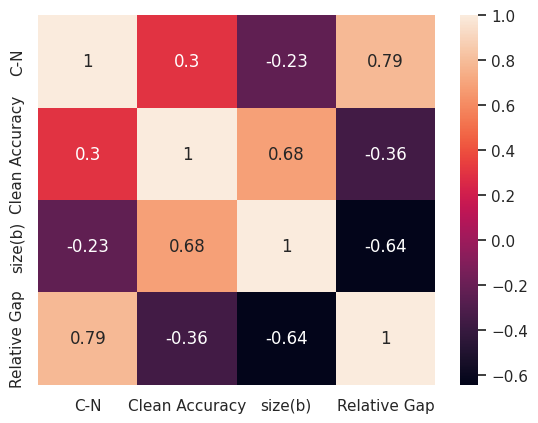

In [110]:
avg_xnli['size(b)'] = [0.179,0.279,0.3,0.58,1,3,7,7,13]
sns.heatmap(avg_xnli[['C-N','Clean Accuracy','size(b)', 'Relative Gap']].corr(), annot=True)


# Average C-N and Relative Gap per model XNLI

<Axes: xlabel='Model'>

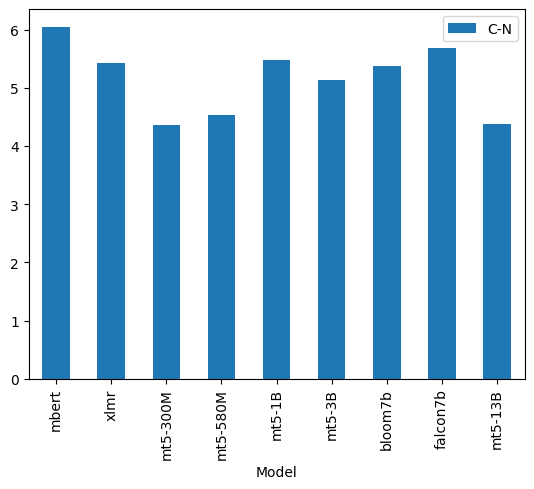

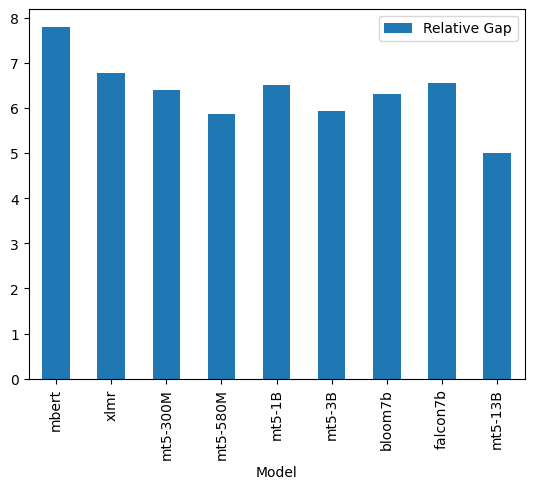

In [11]:
avg_xnli.plot.bar(x = 'Model', y='C-N')
avg_xnli.plot.bar(x = 'Model', y='Relative Gap')

# C-N and Relative Gap per Language for all models

In [113]:
mean_df = df_xnli.groupby('Language')['C-N'].mean()
mean_df

Language
de    4.970000
en    7.472222
es    5.280000
fr    4.686667
hi    3.877500
tr    4.090000
Name: C-N, dtype: float64

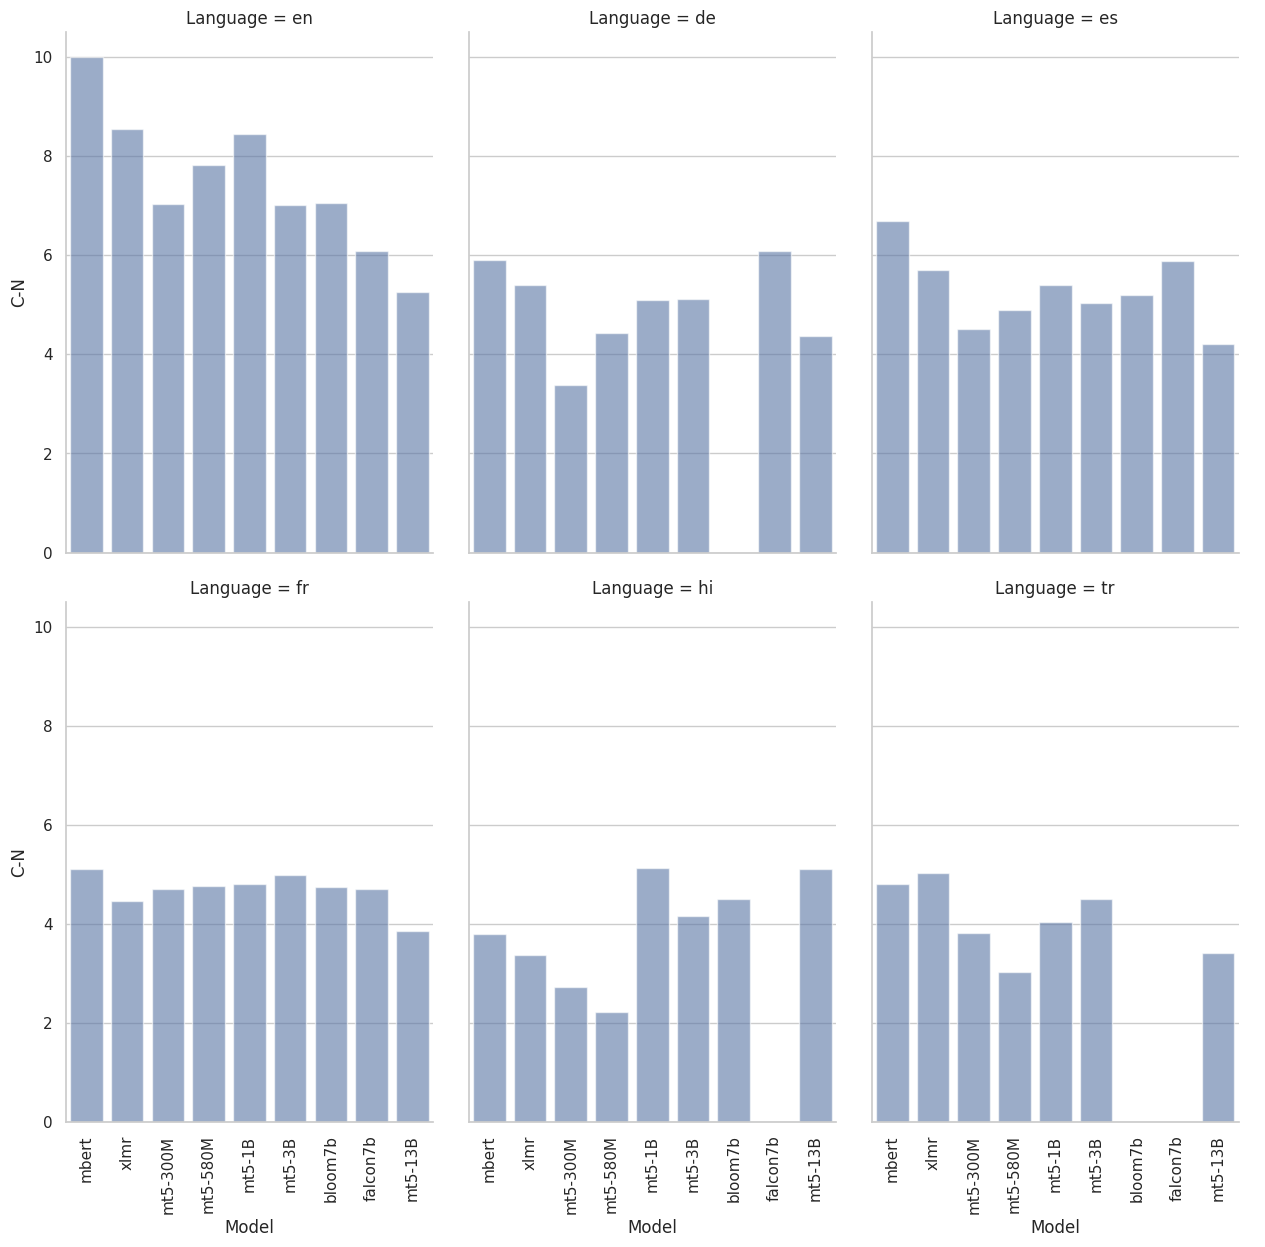

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
g = sns.catplot(
    data=df_xnli, kind="bar",
    x="Model", y="C-N", col="Language",
      alpha=.6, height=6,
    aspect=0.7, col_wrap =3
)

g.set_axis_labels("Model", "C-N")
# g.set_xticklabels(rotation=45)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


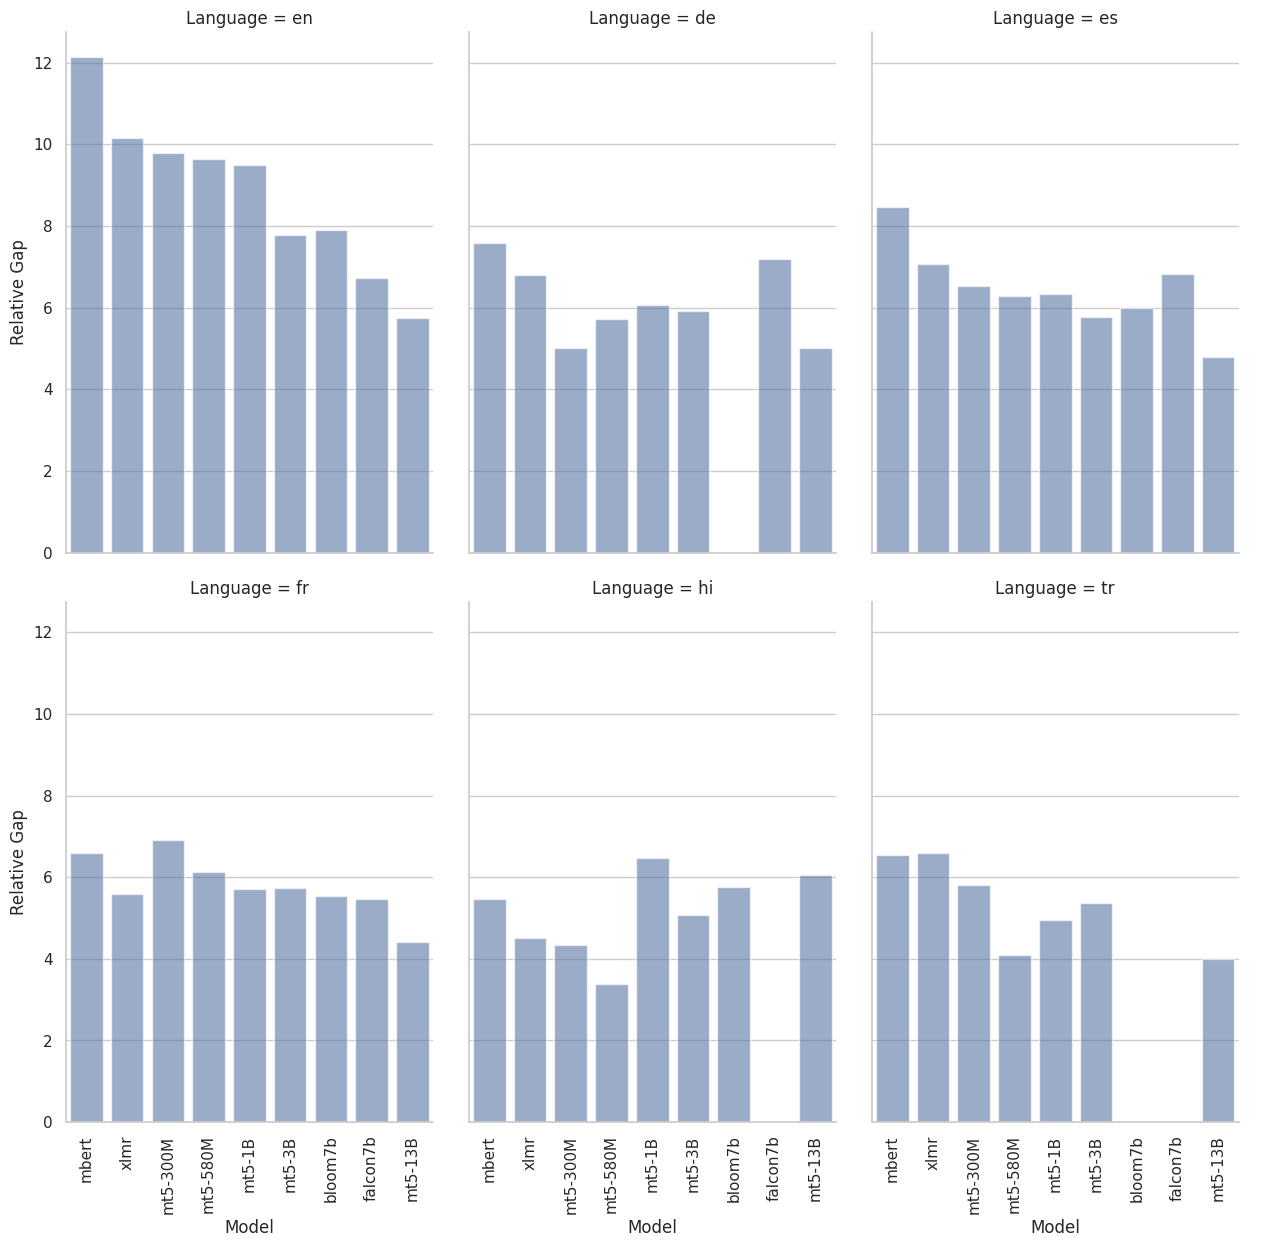

In [56]:
g = sns.catplot(
    data=df_xnli, kind="bar",
    x="Model", y="Relative Gap", col="Language",
      alpha=.6, height=6,
    aspect=0.7, col_wrap =3
)

g.set_axis_labels("Model", "Relative Gap")
# g.set_xticklabels(rotation=45)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()